<h1 style="color: #e1473f;">Proyecto final: </h1> 
<h1 style="color: #80b0ab; margin-left: 200px;">BANCO UNO</h1>
<p style="margin: 20px;">

<p> El banco uno, necesita un análisis, donde busquemos ubicar un escenario donde se haga unaimplementación de modelos de clasificación para determinar si un crédito debe ser otorgado o no a algún cliente.

Donde vamos a utilizar un metodo de PCA(Analisis de componentes principales), para determinar si es posible realizar este mecanismo.
</p>

<h3 style= "color:#80b0ab">1.Importar librerias</h3>

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import ydata_profiling
from ydata_profiling import ProfileReport

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
ruta_archivo = "BancoUno.csv"
df = pd.read_csv(ruta_archivo)

In [4]:
df.head(100)



LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
0      20000  female       university        1  24     2     2    -1    -1   
1     120000  female       university        2  26    -1     2     0     0   
2      90000  female       university        2  34     0     0     0     0   
3      50000  female       university        1  37     0     0     0     0   
4      50000    male       university        1  57    -1     0    -1     0   
..       ...     ...              ...      ...  ..   ...   ...   ...   ...   
95     90000    male       university        2  35     0     0     0     0   
96    360000    male  graduate school        1  43    -1    -1    -1    -1   
97    150000    male  graduate school        2  27     0     0     0     0   
98     50000  female      high school        1  22     0     0     0     0   
99     20000    male       university        1  38     0     0     0     0   

   PAY_5  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
0     -2  ...         0         0         0        0      689        0   
1      0  ...      3272      3455      3261        0     1000     1000   
2      0  ...     14331     14948     15549     1518     1500     1000   
3      0  ...     28314     28959     29547     2000     2019     1200   
4      0  ...     20940     19146     19131     2000    36681    10000   
..   ...  ...       ...       ...       ...      ...      ...      ...   
95     0  ...     35565     30942     30835     3621     3597     1179   
96    -1  ...      6451     26370      9956     8339     3394    12902   
97     0  ...     89775     87725     40788     4031    10006     3266   
98     0  ...     13150      8866      7899     1411     1194      379   
99     0  ...     18240     17928       150     1699     1460      626   

   PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
0         0        0        0                    default  
1      1000        0     2000                    default  
2      1000     1000     5000                not default  
3      1100     1069     1000                not default  
4      9000      689      679                not default  
..      ...      ...      ...                        ...  
95     1112     1104     1143                not default  
96    27000        0    68978                not default  
97     4040     1698      800                not default  
98      281      321      197                not default  
99     1750      150        0                    default  

[100 rows x 24 columns]

In [5]:
credit = df

In [6]:
credit.head

<bound method NDFrame.head of      LIMIT_BAL     SEX    EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
0        20000  female   university        1  24     2     2    -1    -1   
1       120000  female   university        2  26    -1     2     0     0   
2        90000  female   university        2  34     0     0     0     0   
3        50000  female   university        1  37     0     0     0     0   
4        50000    male   university        1  57    -1     0    -1     0   
...        ...     ...          ...      ...  ..   ...   ...   ...   ...   
3664    220000  female   university        1  32     0     0     0     0   
3665     70000  female   university        2  34     1     2     2     2   
3666    120000    male   university        2  37    -1     2     0     0   
3667    180000  female   university        2  32     0     0     0     0   
3668     50000  female  high school        1  57     0     0     0     0   

     PAY_5  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PA

In [7]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas_profiling

C:\Users\Gryll0\AppData\Local\Temp\ipykernel_24352\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [9]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h3 style= "color:#80b0ab">2.Trabajar set de datos para el análisis</h3>

In [10]:
credit.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
credit.shape

(2397, 24)

In [11]:
credit.head(10)

LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
0     20000  female       university        1  24     2     2    -1    -1   
1    120000  female       university        2  26    -1     2     0     0   
2     90000  female       university        2  34     0     0     0     0   
3     50000  female       university        1  37     0     0     0     0   
4     50000    male       university        1  57    -1     0    -1     0   
5     50000    male  graduate school        2  37     0     0     0     0   
6    500000    male  graduate school        2  29     0     0     0     0   
7    100000  female       university        2  23     0    -1    -1     0   
8    140000  female      high school        1  28     0     0     2     0   
9     20000    male      high school        2  35    -2    -2    -2    -2   

  PAY_5  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
0    -2  ...         0         0         0        0      689        0   
1     0  ...      3272      3455      3261        0     1000     1000   
2     0  ...     14331     14948     15549     1518     1500     1000   
3     0  ...     28314     28959     29547     2000     2019     1200   
4     0  ...     20940     19146     19131     2000    36681    10000   
5     0  ...     19394     19619     20024     2500     1815      657   
6     0  ...    542653    483003    473944    55000    40000    38000   
7     0  ...       221      -159       567      380      601        0   
8     0  ...     12211     11793      3719     3329        0      432   
9    -1  ...         0     13007     13912        0        0        0   

  PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
0        0        0        0                    default  
1     1000        0     2000                    default  
2     1000     1000     5000                not default  
3     1100     1069     1000                not default  
4     9000      689      679                not default  
5     1000     1000      800                not default  
6    20239    13750    13770                not default  
7      581     1687     1542                not default  
8     1000     1000     1000                not default  
9    13007     1122        0                not default  

[10 rows x 24 columns]

In [13]:
pip install --upgrade --user scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import linear_model  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



<h3 style= "color:#80b0ab">3.Acomodar el Dtype</h3>

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2397 non-null   object
 1   SEX                         2397 non-null   object
 2   EDUCATION                   2397 non-null   object
 3   MARRIAGE                    2397 non-null   object
 4   AGE                         2397 non-null   object
 5   PAY_0                       2397 non-null   object
 6   PAY_2                       2397 non-null   object
 7   PAY_3                       2397 non-null   object
 8   PAY_4                       2397 non-null   object
 9   PAY_5                       2397 non-null   object
 10  PAY_6                       2397 non-null   object
 11  BILL_AMT1                   2397 non-null   object
 12  BILL_AMT2                   2397 non-null   object
 13  BILL_AMT3                   2397 non-null   obje

In [16]:
columns_to_convert = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

credit[columns_to_convert] = credit[columns_to_convert].apply(pd.to_numeric, errors='coerce')

print(credit.dtypes)

LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month     object
dtype: object


In [17]:
credit.to_excel("credit.xlsx")

In [18]:
credit = pd.read_excel("credit.xlsx")
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(10)

LIMIT_BAL     SEX        EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0    20000.0  female       university        1  24.0    2.0    2.0   -1.0   
1   120000.0  female       university        2  26.0   -1.0    2.0    0.0   
2    90000.0  female       university        2  34.0    0.0    0.0    0.0   
3    50000.0  female       university        1  37.0    0.0    0.0    0.0   
4    50000.0    male       university        1  57.0   -1.0    0.0   -1.0   
5    50000.0    male  graduate school        2  37.0    0.0    0.0    0.0   
6   500000.0    male  graduate school        2  29.0    0.0    0.0    0.0   
7   100000.0  female       university        2  23.0    0.0   -1.0   -1.0   
8   140000.0  female      high school        1  28.0    0.0    0.0    2.0   
9    20000.0    male      high school        2  35.0   -2.0   -2.0   -2.0   

   PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0   -1.0   -2.0  ...        0.0        0.0        0.0       0.0     689.0   
1    0.0    0.0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2    0.0    0.0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3    0.0    0.0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4    0.0    0.0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
5    0.0    0.0  ...    19394.0    19619.0    20024.0    2500.0    1815.0   
6    0.0    0.0  ...   542653.0   483003.0   473944.0   55000.0   40000.0   
7    0.0    0.0  ...      221.0     -159.0      567.0     380.0     601.0   
8    0.0    0.0  ...    12211.0    11793.0     3719.0    3329.0       0.0   
9   -2.0   -1.0  ...        0.0    13007.0    13912.0       0.0       0.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0       0.0       0.0       0.0       0.0                     default  
1    1000.0    1000.0       0.0    2000.0                     default  
2    1000.0    1000.0    1000.0    5000.0                 not default  
3    1200.0    1100.0    1069.0    1000.0                 not default  
4   10000.0    9000.0     689.0     679.0                 not default  
5     657.0    1000.0    1000.0     800.0                 not default  
6   38000.0   20239.0   13750.0   13770.0                 not default  
7       0.0     581.0    1687.0    1542.0                 not default  
8     432.0    1000.0    1000.0    1000.0                 not default  
9       0.0   13007.0    1122.0       0.0                 not default  

[10 rows x 24 columns]

In [19]:
credit = credit.rename(columns={'default payment next month': 'Y'})

In [20]:
#from sklearn.impute import SimpleImputer #Prueba 

#imputer = SimpleImputer(strategy='mean')
#x_imputed = imputer.fit_transform(x)

credit_limpio = credit.dropna()

In [21]:
credit_limpio.shape

(2396, 24)

In [22]:
credit_limpio.dtypes



LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
Y             object
dtype: object

In [23]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6']

x = credit_limpio.loc[:, features].values

y = credit_limpio.loc[:,['Y']].values

x = StandardScaler().fit_transform(x)
print (x)

[[-1.12642689 -1.20840397  1.77647823 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.99677208 -0.89437003 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.15024451 -0.00408727 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728 -1.20840397  0.88619548 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.89095613 -0.00408727 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.67932424 -0.00408727 ... -0.20965753 -0.29438625
   0.0036902 ]]


In [24]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

principalDf.head(10)

principal_component_1  principal_component_2
0              -1.870269              -0.761324
1              -0.767852              -2.018216
2              -0.832976              -0.968938
3              -0.222360              -0.818188
4              -0.713476               0.111343
5              -0.213890              -0.812256
6              13.819369               6.281610
7              -1.785734              -0.355062
8              -0.697276              -1.563619
9              -2.741159               1.646885

In [25]:
finalDf = pd.concat([principalDf, credit[['Y']]], axis = 1)
finalDf.head(10)

principal_component_1  principal_component_2            Y
0              -1.870269              -0.761324      default
1              -0.767852              -2.018216      default
2              -0.832976              -0.968938  not default
3              -0.222360              -0.818188  not default
4              -0.713476               0.111343  not default
5              -0.213890              -0.812256  not default
6              13.819369               6.281610  not default
7              -1.785734              -0.355062  not default
8              -0.697276              -1.563619  not default
9              -2.741159               1.646885  not default

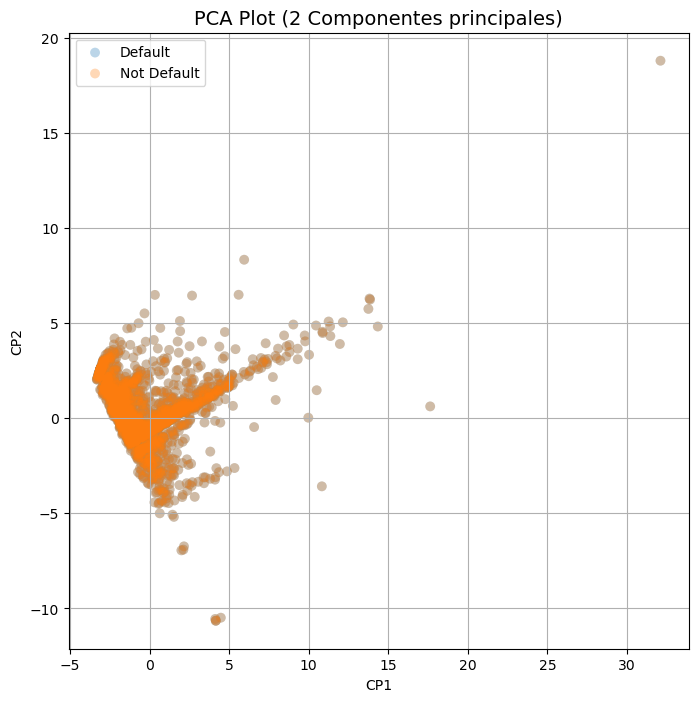

In [35]:

fig, ax = plt.subplots(figsize=(8, 8))

# Establecer etiquetas y título
ax.set_xlabel('CP1', fontsize=10)
ax.set_ylabel('CP2', fontsize=10)
ax.set_title('PCA Plot (2 Componentes principales)', fontsize=14)

categories = ['Default', 'Not Default']
colors = plt.cm.tab10.colors 


for category, color in zip(categories, colors):
    indices = finalDf['Y'] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1'],
               finalDf.loc[indicesToKeep, 'principal_component_2'],
               c=[color],  # Necesario convertir a lista para evitar errores
               s=50,
               alpha=0.3,
               edgecolors='none')

ax.legend(categories)
ax.grid(True)
plt.show()

<p> Aplicando este PCA, la varianza se divide en dos proporciones (0.33 + 0.20), obtienes el 0.53 (53%). Esto significa que, al proyectar tus datos en estos dos componentes principales, retienes aproximadamente el 53% de la información original contenida en los datos originales de 23 dimensiones.

Teniendo en cuenta esto, significa que al reducir los datos a solo dos dimensiones estamos perdiendo el 47% de la información original
</p>

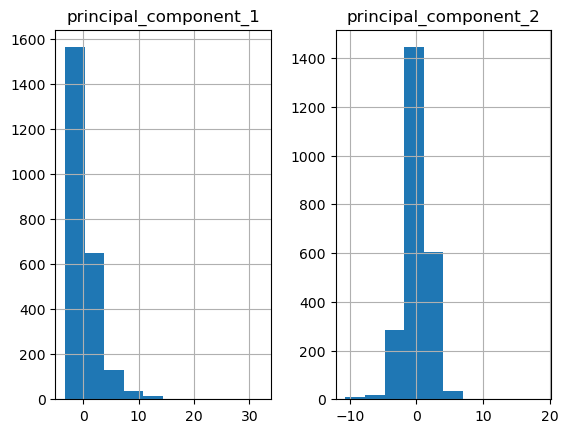

In [36]:
viz = finalDf[['principal_component_1','principal_component_2','Y']]
viz.hist()
plt.show()

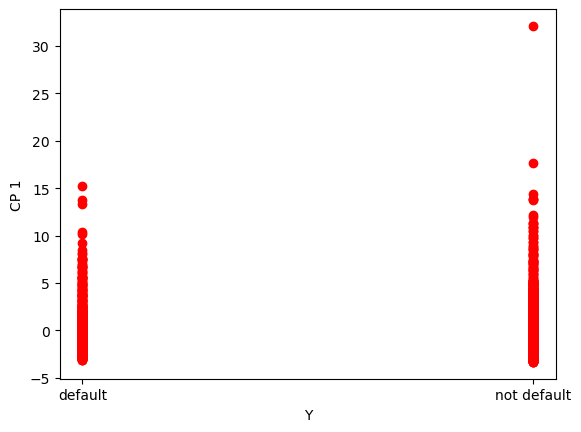

In [42]:
plt.scatter(finalDf.Y, finalDf.principal_component_1,  color='red')
plt.xlabel("Y")
plt.ylabel("CP 1")
plt.show()

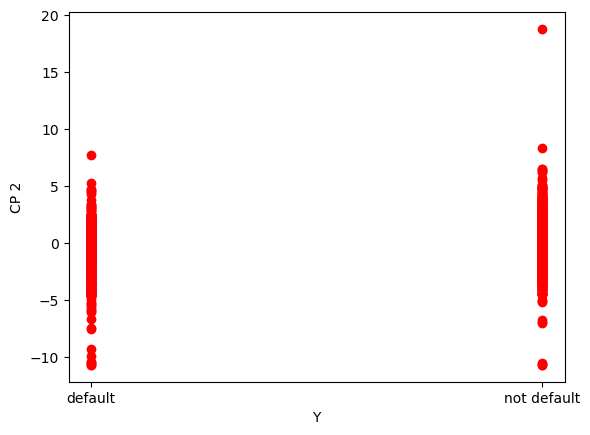

In [41]:


plt.scatter(finalDf['Y'], finalDf['principal_component_2'], color='red')  # Intercambiar el orden de las variables en scatter
plt.xlabel("Y")
plt.ylabel("CP 2")
plt.show()

<p>Se realizaron estos dos gráficos, con el fin de validar si es viable utilizar la regresión lineal, sin embargo, parece ser que nos es viable la implementación del mismo, por lo que no es posible implementar alguno de estos metodos de ML.</p>  